# Two-Level: Weak Pulse through Very Few Atoms


Time taken to solve this problem on a 2013 MacBook Pro:
**37.3 s**.

## Define the Problem

In [1]:
mb_solve_json = """
{
  "ob_atom": {
    "decays": [
      {
        "channels": [[0, 1]],
        "rate": 0.0
      }
    ],
    "energies": [],
    "fields": [
      {
        "coupled_levels": [[0, 1]],
        "detuning": 0.0,
        "detuning_positive": true,
        "label": "probe",
        "rabi_freq": 1.0e-3,
        "rabi_freq_t_args": {
          "ampl_1": 1.0,
          "centre_1": 0.0,
          "fwhm_1": 1.0
        },
        "rabi_freq_t_func": "gaussian_1"
      }
    ],
    "num_states": 2
  },
  "t_min": -2.0,
  "t_max": 10.0,
  "t_steps": 100,
  "z_min": -0.2,
  "z_max": 1.2,
  "z_steps": 100,
  "z_steps_inner": 2,
  "num_density_z_func": "square_1",
  "num_density_z_args": {
    "on_1": 0.0,
    "off_1": 1.0,
    "ampl_1": 1.0
  },
  "interaction_strengths": [
    0.1
  ],
  "velocity_classes": {
    "thermal_delta_min": -0.0,
    "thermal_delta_max": 0.0,
    "thermal_delta_steps": 0,
    "thermal_delta_inner_min": 0.0,
    "thermal_delta_inner_max": 0.0,
    "thermal_delta_inner_steps": 0,
    "thermal_width": 1.0
  },
  "method": "mesolve",
  "opts": {},
  "savefile": "qu/mb-solve-two-weak-pulse-very-few-atoms"
}
"""

In [2]:
from maxwellbloch import mb_solve
mb_solve_00 = mb_solve.MBSolve().from_json_str(mb_solve_json)

## Solve the Problem

In [3]:
%time Omegas_zt, states_zt = mb_solve_00.mbsolve(recalc=False)

Loaded tuple object.
CPU times: user 1.54 ms, sys: 2.11 ms, total: 3.65 ms
Wall time: 7.09 ms


In [4]:
mb_solve_00.Omegas_zt[0].shape

(102, 101)

## Field Output

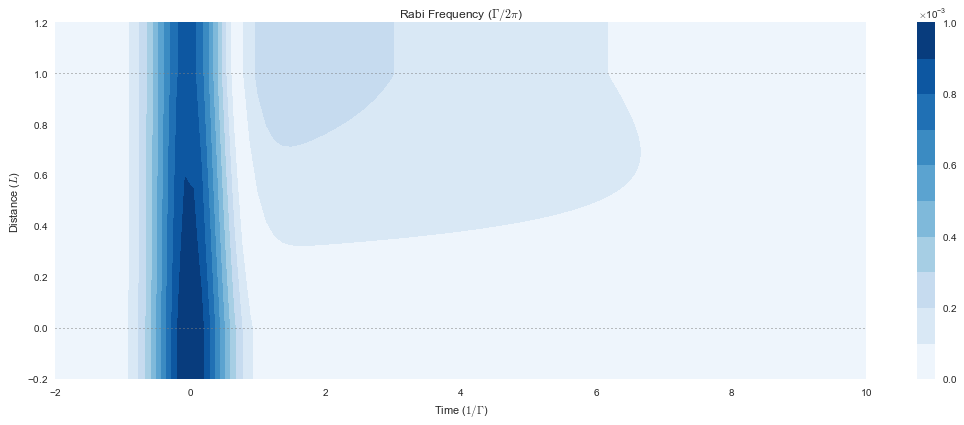

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import numpy as np

fig = plt.figure(1, figsize=(16, 6))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mb_solve_00.tlist, mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_zt[0]/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf)
plt.savefig('images/mb-solve-two-weak-pulse-very-few-atoms.png')

In [6]:
mb_solve_00.tlist_fixed_frame(speed_of_light=0.5)

array([ -2.48  ,  -2.3312,  -2.1824,  -2.0336,  -1.8848,  -1.736 ,
        -1.5872,  -1.4384,  -1.2896,  -1.1408,  -0.992 ,  -0.8432,
        -0.6944,  -0.5456,  -0.3968,  -0.248 ,  -0.0992,   0.0496,
         0.1984,   0.3472,   0.496 ,   0.6448,   0.7936,   0.9424,
         1.0912,   1.24  ,   1.3888,   1.5376,   1.6864,   1.8352,
         1.984 ,   2.1328,   2.2816,   2.4304,   2.5792,   2.728 ,
         2.8768,   3.0256,   3.1744,   3.3232,   3.472 ,   3.6208,
         3.7696,   3.9184,   4.0672,   4.216 ,   4.3648,   4.5136,
         4.6624,   4.8112,   4.96  ,   5.1088,   5.2576,   5.4064,
         5.5552,   5.704 ,   5.8528,   6.0016,   6.1504,   6.2992,
         6.448 ,   6.5968,   6.7456,   6.8944,   7.0432,   7.192 ,
         7.3408,   7.4896,   7.6384,   7.7872,   7.936 ,   8.0848,
         8.2336,   8.3824,   8.5312,   8.68  ,   8.8288,   8.9776,
         9.1264,   9.2752,   9.424 ,   9.5728,   9.7216,   9.8704,
        10.0192,  10.168 ,  10.3168,  10.4656,  10.6144,  10.7

In [7]:
print(mb_solve_00.tlist.shape)
print(mb_solve_00.zlist.shape)
print(mb_solve_00.Omegas_zt[0].shape)

(101,)
(102,)
(102, 101)


In [8]:
mb_solve_00.Omegas_zt

array([[[  9.58737992e-008+0.j,   3.48608684e-007+0.j,
           1.17030163e-006+0.j, ...,   1.24910863e-117+0.j,
           1.81438829e-120+0.j,   2.43322126e-123+0.j],
        [  9.58737992e-008+0.j,   3.48608684e-007+0.j,
           1.17030163e-006+0.j, ...,   1.24910863e-117+0.j,
           1.81438829e-120+0.j,   2.43322126e-123+0.j],
        [  9.58737992e-008+0.j,   3.48608684e-007+0.j,
           1.17030163e-006+0.j, ...,   1.24910863e-117+0.j,
           1.81438829e-120+0.j,   2.43322126e-123+0.j],
        ..., 
        [  9.58737992e-008+0.j,   3.37722848e-007+0.j,
           1.12653640e-006+0.j, ...,  -1.64335434e-004+0.j,
          -1.52577515e-004+0.j,  -1.41123015e-004+0.j],
        [  9.58737992e-008+0.j,   3.37722848e-007+0.j,
           1.12653640e-006+0.j, ...,  -1.64335434e-004+0.j,
          -1.52577515e-004+0.j,  -1.41123015e-004+0.j],
        [  9.58737992e-008+0.j,   3.37722848e-007+0.j,
           1.12653640e-006+0.j, ...,  -1.64335434e-004+0.j,
          -1.525

In [9]:
Omegas_fixed_frame = mb_solve_00.Omegas_fixed_frame(field_idx=0, speed_of_light=0.25)

In [10]:
Omegas_fixed_frame

array([[  0.00000000e+00,   1.24257240e-07,   7.49524408e-07, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   5.64028605e-07, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   4.23676003e-07, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -1.64652005e-04,  -1.47335284e-04,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -1.70215972e-04,  -1.52732672e-04,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
         -1.75826139e-04,  -1.58192492e-04,  -1.41123015e-04]])

In [11]:
np.max(Omegas_fixed_frame)

0.0062831821492155618

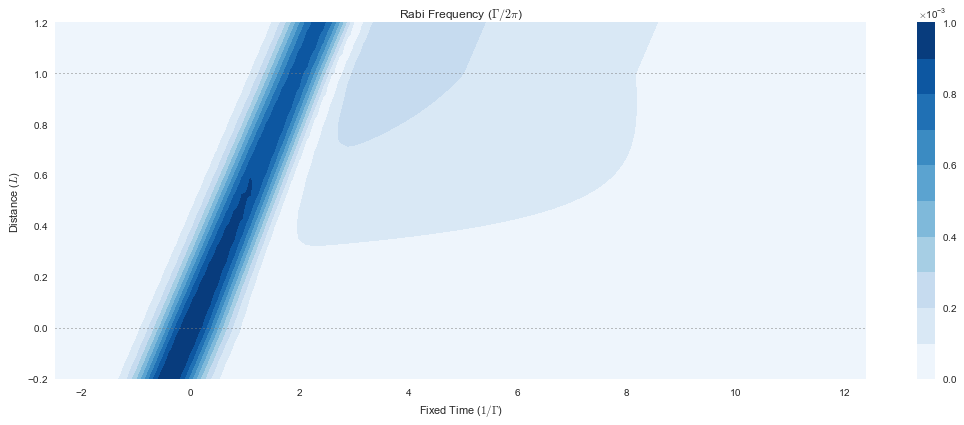

In [12]:
speed_of_light = 0.5
fig = plt.figure(2, figsize=(16, 6))
ax = fig.add_subplot(111)
cmap_range = np.linspace(0.0, 1.0e-3, 11)
cf = ax.contourf(mb_solve_00.tlist_fixed_frame(speed_of_light), mb_solve_00.zlist, 
                 np.abs(mb_solve_00.Omegas_fixed_frame(0, speed_of_light)/(2*np.pi)), 
                 cmap_range, cmap=plt.cm.Blues)
ax.set_title('Rabi Frequency ($\Gamma / 2\pi $)')
ax.set_xlabel('Fixed Time ($1/\Gamma$)')
ax.set_ylabel('Distance ($L$)')
for y in [0.0, 1.0]:
    ax.axhline(y, c='grey', lw=1.0, ls='dotted')
plt.colorbar(cf)